<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCK_Project_Article's_approach012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification

##Connecting to drive & importing data

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')

In [3]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal


##Data Preprocessing

1/ Changing the Class into bin

In [4]:
data['classe']=data['classe'].replace("hate", int(2)) #Change it to 2
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [5]:
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


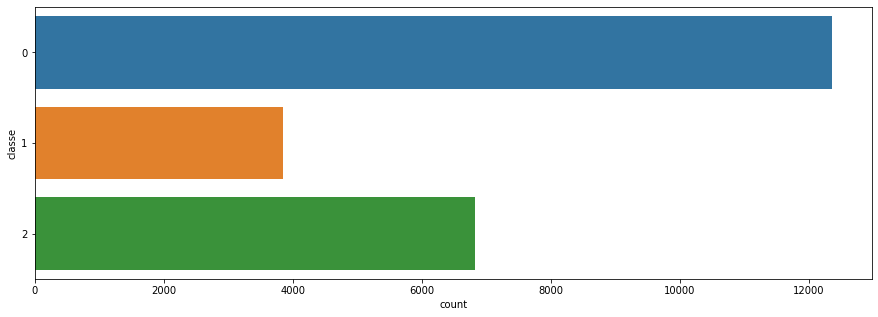

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [7]:
print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

classe
0    12353
Name: classe, dtype: int64
classe
1    3850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


#Importing extra data

In [6]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")
data5=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/D5.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


data5['classe']=data5['classe'].replace("hate", int(2))
data5['classe']=data5['classe'].replace("normal", int(0)) 
data5['classe']=data5['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
C3=data5["commentaire"]
L1=data12["classe"]
L2=data34["classe"]
L3=data5["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]
data5=[[i,j] for i,j in zip(C3 , L3)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])
data5=pd.DataFrame(data5,columns=["sentences","classe"])


2/ NLP Data Preparations

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = []
labels = []

sentences = data['commentaire']
labels = data['classe']
L=[]
#for i in labels:
#  if (i != '1') and (i != '0'):
#    L.append(i)

labels = [int(i) for i in labels]
#L

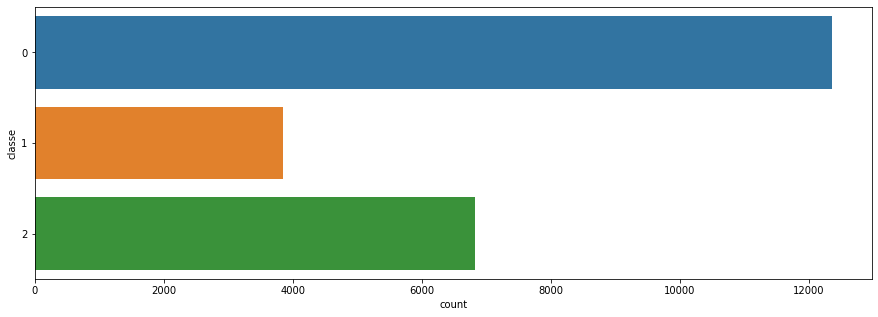

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [8]:
#Figure out the longest comment
Nsentences=data['commentaire']
Nlables=data['classe']
def count_words(input):
  return len(input.split())
max_length=count_words(max(Nsentences,key=count_words))
max_length+=2
max_length=209

##The way that the computers percieve words and phrases is diffrent from the way that we preceve it as human beings. There are a veriety of ways for us that we can utilise to program the data type that we have and to make it numerical so that the model can get some meaning out of it. We call this part encoding text.
##we can transfor each alphabet and caracter to it's ASCII Code, but this approach wasn't proven to give great results [To Research] !!!
#What I did in the code was: Continus or distributed Embeddings Vectors representation:
* First: Build a dictionary of tokens: I defined a dictionnary That has the words as keys and a unique number as a value
* I then changed all of the phrases into Lists that has integers that indicate which word is in that particular place
* Use One-Hot Vector

##After doing this process, we have a numerical data that the model can use to get some meaning out of the labels

In [9]:
training_size=int(len(Nsentences)*0.8)   #Experimenting setup

training_sentences = Nsentences[0:training_size]
testing_sentences = Nsentences[training_size:]
training_labels = Nlables[0:training_size]
testing_labels = Nlables[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [10]:
Nsentences12=data12["sentences"]
Nlabels12=data12["classe"]

training_size12=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences12[training_size12:]
testing_labels12 = Nlabels12[training_size12:]

##########

Nsentences34=data34["sentences"]
Nlabels34=data34["classe"]

training_size34=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences34[training_size34:]
testing_labels34 = Nlabels34[training_size34:]

##########

Nsentences5=data5["sentences"]
Nlabels5=data5["classe"]

training_size5=int(len(Nsentences5)*0.8)

testing_sentences5 = Nsentences34[training_size5:]
testing_labels5 = Nlabels34[training_size5:]

testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences5 = tokenizer.texts_to_sequences(testing_sentences5)
testing_padded5 = pad_sequences(testing_sequences5, maxlen=max_length, padding='post', truncating='post')

#Modelling

##Article's Approach

In [11]:
import numpy as np
EDtraining_padded=np.expand_dims(np.array(training_padded), axis=-1)
EDtesting_padded=np.expand_dims(np.array(testing_padded), axis=-1)
EDtraining_padded.shape

(18426, 209, 1)

In [4]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.2


BaseException: ignored

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
def model(EDtraining_padded,EDtesting_padded):
  EncoModel = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(390,1)),                             
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),#Start Encoder
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(), #End Encoder
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.UpSampling1D(2),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.UpSampling1D(2),
    tf.keras.layers.Conv1D(1, 3, activation='sigmoid')
  ])
  EncoModel.summary()

  EncoModel.compile(loss='mean_squared_error', optimizer = RMSprop(),metrics=['accuracy'])

  EncoModel_train = EncoModel.fit(EDtraining_padded, EDtraining_padded, batch_size=32, epochs=25, verbose=1, validation_data=(EDtesting_padded, EDtesting_padded))
  return EncoModel,EncoModel_train
with tpu_strategy.scope():
  EncoModel,EncoModel_train=model(EDtraining_padded, EDtesting_padded)

NameError: ignored

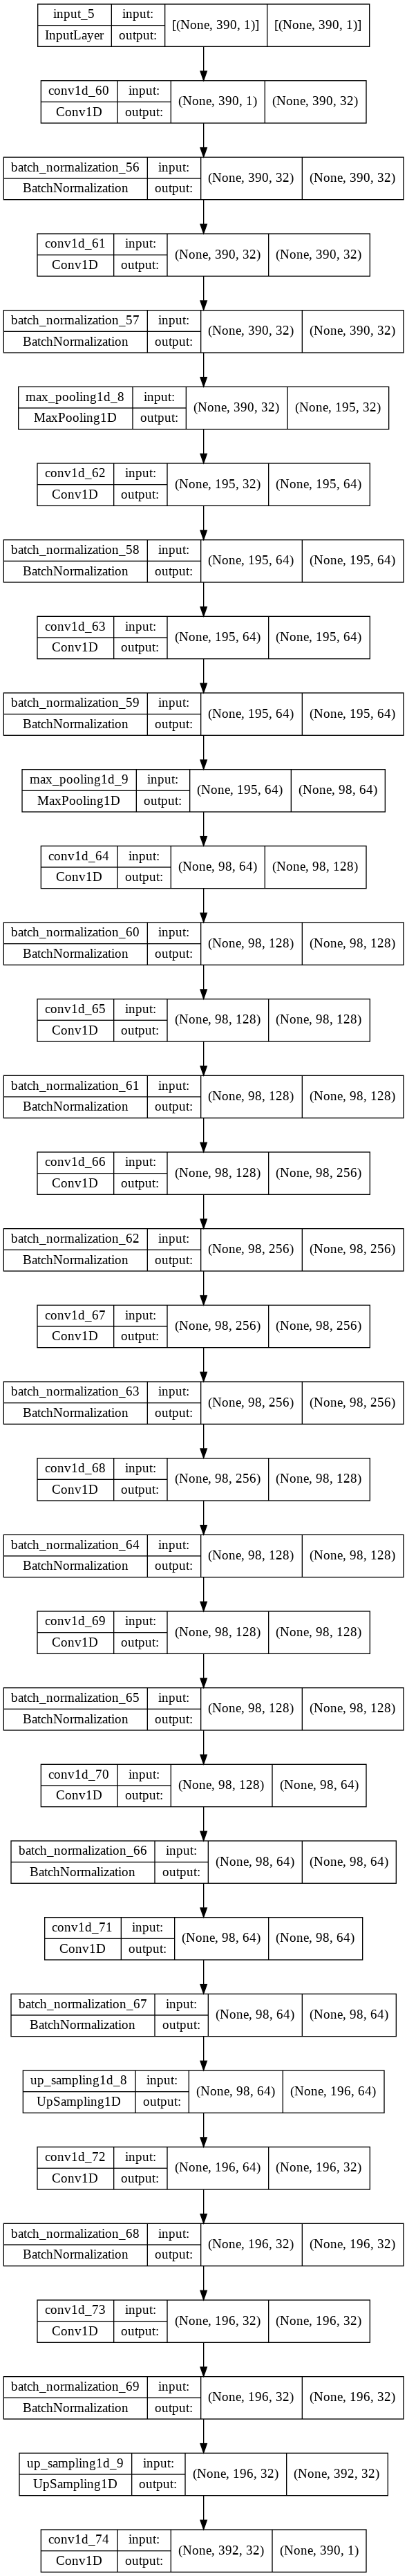

In [ ]:
tf.keras.utils.plot_model(EncoModel, show_shapes=True)

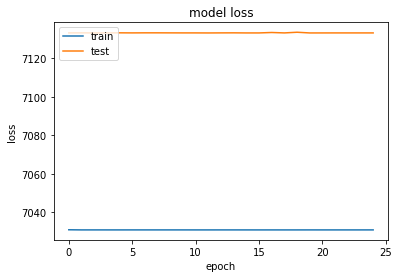

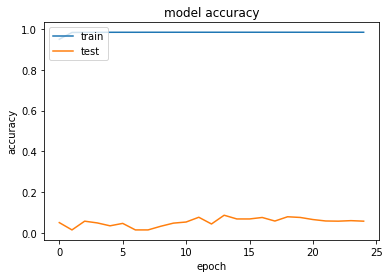

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(EncoModel_train.history['loss'])
plt.plot(EncoModel_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(EncoModel_train.history['accuracy'])
plt.plot(EncoModel_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

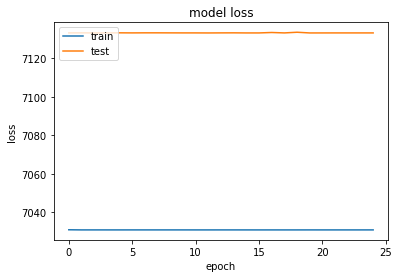

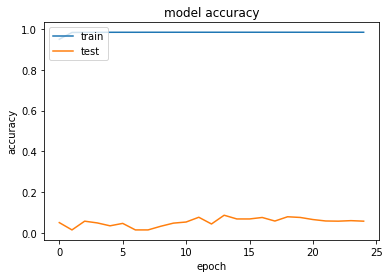

In [ ]:
# summarize history for accuracy
plt.plot(EncoModel_train.history['loss'])
plt.plot(EncoModel_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(EncoModel_train.history['accuracy'])
plt.plot(EncoModel_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def Fullmodel(EDtraining_padded, training_labels1, EDtesting_padded, testing_labels1):
  FullModel = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(390,1)),                             
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),#Start Encoder
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(), #End Encoder #Add LSTM + Embedding
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  FullModel.summary()
  training_labels1=[]
  testing_labels1=[]
  for i in training_labels:
    if i == 0:
      training_labels1.append([1,0,0])
    elif i == 1:
      training_labels1.append([0,1,0])
    else:
      training_labels1.append([0,0,1])
  for i in testing_labels:
    if i == 0:
      testing_labels1.append([1,0,0])
    elif i == 1:
      testing_labels1.append([0,1,0])
    else:
      testing_labels1.append([0,0,1])
  for l1,l2 in zip(FullModel.layers[:18],EncoModel.layers[0:18]):
      l1.set_weights(l2.get_weights())
#First we train only the last three layers
  for layer in FullModel.layers[0:18]:
      layer.trainable = False
    
  FullModel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

  training_labels1 = np.asarray(training_labels1).astype(np.int)
  testing_labels1 = np.asarray(testing_labels1).astype(np.int)

  history = FullModel.fit(EDtraining_padded, training_labels1, batch_size=128, epochs=60, validation_data=(EDtesting_padded, testing_labels1), verbose=1)
  return FullModel,history
with tpu_strategy.scope():
  FullModel,history=Fullmodel(EDtraining_padded, training_labels, EDtesting_padded, testing_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_75 (Conv1D)          (None, 390, 32)           96        
                                                                 
 batch_normalization_70 (Bat  (None, 390, 32)          128       
 chNormalization)                                                
                                                                 
 conv1d_76 (Conv1D)          (None, 390, 32)           2080      
                                                                 
 batch_normalization_71 (Bat  (None, 390, 32)          128       
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 195, 32)          0         
 g1D)                                                            
                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

Epoch 1/60
162/162 [==============================] - 11s 32ms/step - loss: 2.0311 - accuracy: 0.5070 - val_loss: 0.6437 - val_accuracy: 0.5477
Epoch 2/60
162/162 [==============================] - 4s 24ms/step - loss: 0.6492 - accuracy: 0.5276 - val_loss: 0.6436 - val_accuracy: 0.5499
Epoch 3/60
162/162 [==============================] - 4s 24ms/step - loss: 0.7828 - accuracy: 0.5085 - val_loss: 0.6528 - val_accuracy: 0.5295
Epoch 4/60
162/162 [==============================] - 4s 24ms/step - loss: 0.6330 - accuracy: 0.5299 - val_loss: 0.6187 - val_accuracy: 0.5512
Epoch 5/60
162/162 [==============================] - 4s 24ms/step - loss: 0.6815 - accuracy: 0.5296 - val_loss: 0.6580 - val_accuracy: 0.5499
Epoch 6/60
162/162 [==============================] - 4s 24ms/step - loss: 0.6309 - accuracy: 0.5278 - val_loss: 0.6520 - val_accuracy: 0.5482
Epoch 7/60
162/162 [==============================] - 4s 24ms/step - loss: 0.6933 - accuracy: 0.5250 - val_loss: 0.5881 - val_accuracy: 0.544

In [26]:
for layer in FullModel.layers[0:18]:
  layer.trainable = False
training_labels1=[]
testing_labels1=[]
for i in training_labels:
  if i == 0:
    training_labels1.append([1,0,0])
  elif i == 1:
    training_labels1.append([0,1,0])
  else:
    training_labels1.append([0,0,1])
for i in testing_labels:
  if i == 0:
    testing_labels1.append([1,0,0])
  elif i == 1:
    testing_labels1.append([0,1,0])
  else:
    testing_labels1.append([0,0,1])

training_labels1 = np.asarray(training_labels1).astype(np.int)
testing_labels1 = np.asarray(testing_labels1).astype(np.int)

FullModel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

history=FullModel.fit(EDtraining_padded, training_labels1, batch_size=128, epochs=60, validation_data=(EDtesting_padded, testing_labels1), verbose=1)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

144/144 [==============================] - 14s 92ms/step - loss: 0.4498 - accuracy: 0.8021 - val_loss: 0.4288 - val_accuracy: 0.7443
Epoch 2/60
144/144 [==============================] - 12s 85ms/step - loss: 0.2301 - accuracy: 0.8369 - val_loss: 0.4200 - val_accuracy: 0.7530
Epoch 3/60
144/144 [==============================] - 12s 85ms/step - loss: 0.2106 - accuracy: 0.8480 - val_loss: 0.4253 - val_accuracy: 0.7582
Epoch 4/60
144/144 [==============================] - 12s 85ms/step - loss: 0.2015 - accuracy: 0.8523 - val_loss: 0.4161 - val_accuracy: 0.7582
Epoch 5/60
144/144 [==============================] - 12s 85ms/step - loss: 0.1976 - accuracy: 0.8536 - val_loss: 0.4207 - val_accuracy: 0.7565
Epoch 6/60
144/144 [==============================] - 13s 89ms/step - loss: 0.1897 - accuracy: 0.8614 - val_loss: 0.3929 - val_accuracy: 0.7651
Epoch 7/60
144/144 [==============================] - 13s 92ms/step - loss: 0.1930 - accuracy: 0.8559 - val_loss: 0.3891 - val_accuracy: 0.7645
Epo

In [13]:
import tensorflow as tf
FullModel= tf.keras.models.load_model('FullModelArticleApproachBalanced.h5')

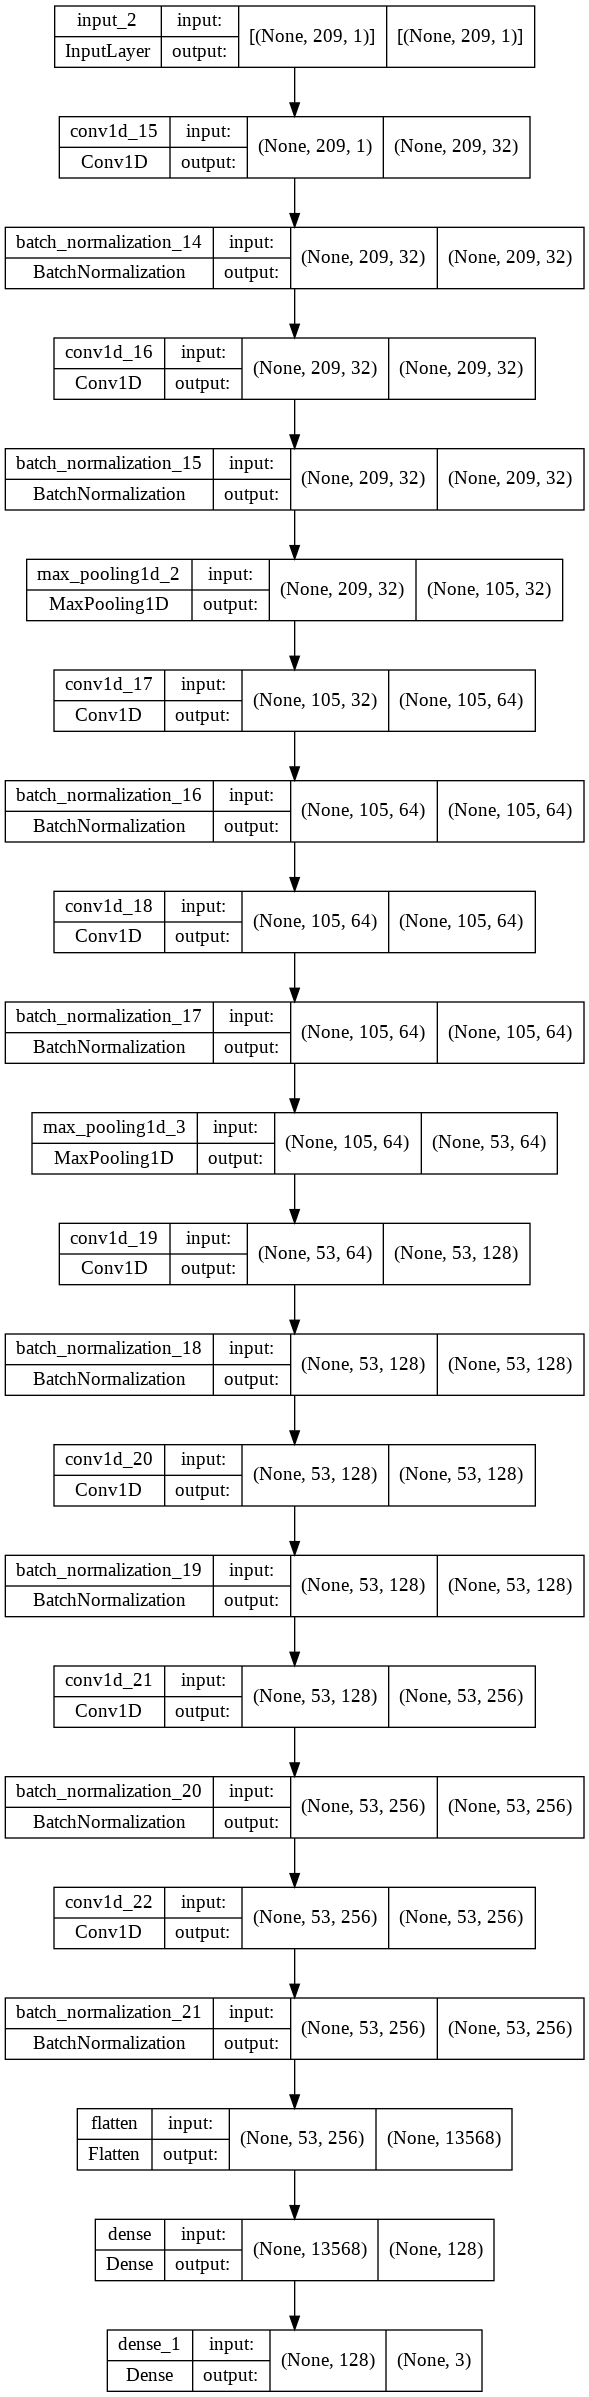

In [24]:
tf.keras.utils.plot_model(FullModel, show_shapes=True)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
pred1=FullModel.predict(testing_padded)
pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
print(cm)
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

[[2392  101  202]
 [ 282  436   80]
 [ 305  100  709]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2695
           1       0.68      0.55      0.61       798
           2       0.72      0.64      0.67      1114

    accuracy                           0.77      4607
   macro avg       0.73      0.69      0.71      4607
weighted avg       0.76      0.77      0.76      4607



In [28]:
pred12=FullModel.predict(testing_padded12)
rounded_labels212=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels212)
print(cm12)
print(classification_report(testing_labels12, rounded_labels212, labels=[0,1,2]))

[[439  67  81]
 [127 100  26]
 [167  94 191]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67       587
           1       0.38      0.40      0.39       253
           2       0.64      0.42      0.51       452

    accuracy                           0.57      1292
   macro avg       0.54      0.52      0.52      1292
weighted avg       0.57      0.57      0.56      1292



In [29]:
pred34=FullModel.predict(testing_padded34)
rounded_labels234=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels234)
print(cm34)
print(classification_report(testing_labels34, rounded_labels234, labels=[0,1,2]))

[[ 492    5   29]
 [   0    7    0]
 [  84   16 1207]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       526
           1       0.25      1.00      0.40         7
           2       0.98      0.92      0.95      1307

    accuracy                           0.93      1840
   macro avg       0.69      0.95      0.75      1840
weighted avg       0.94      0.93      0.93      1840



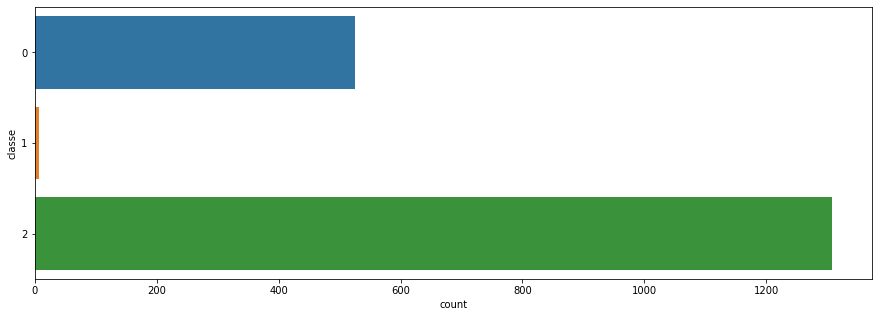

In [30]:
tdata34=[[i,j] for i,j in zip(testing_padded34 , testing_labels34)]

tdata34=pd.DataFrame(tdata34,columns=["sentences","classe"])

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = tdata34)
plt.show()

In [31]:
pred5=FullModel.predict(testing_padded5)
rounded_labels25=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels25)
print(cm5)
print(classification_report(testing_labels5, rounded_labels25, labels=[0,1,2]))

[[3520  140  375]
 [ 477  429  548]
 [ 274  163 2390]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4035
           1       0.59      0.30      0.39      1454
           2       0.72      0.85      0.78      2827

    accuracy                           0.76      8316
   macro avg       0.71      0.67      0.67      8316
weighted avg       0.75      0.76      0.74      8316



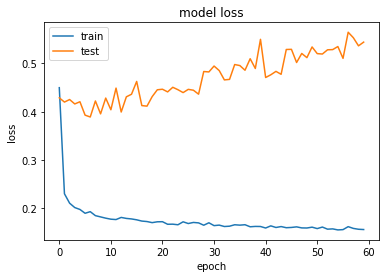

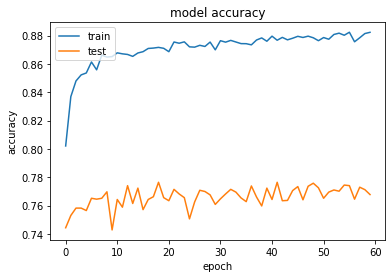

In [32]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Second we train the whole model's layers
for layer in FullModel.layers[0:19]:
    layer.trainable = True

training_labels1=[]
testing_labels1=[]
for i in training_labels:
  if i == 0:
    training_labels1.append([1,0,0])
  elif i == 1:
    training_labels1.append([0,1,0])
  else:
    training_labels1.append([0,0,1])
for i in testing_labels:
  if i == 0:
    testing_labels1.append([1,0,0])
  elif i == 1:
    testing_labels1.append([0,1,0])
  else:
    testing_labels1.append([0,0,1])
training_labels1 = np.asarray(training_labels1).astype(np.int)
testing_labels1 = np.asarray(testing_labels1).astype(np.int)
FullModel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

history = FullModel.fit(EDtraining_padded, training_labels1, batch_size=128, epochs=30, validation_data=(EDtesting_padded, testing_labels1), verbose=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

144/144 [==============================] - 75s 500ms/step - loss: 0.2264 - accuracy: 0.8515 - val_loss: 7.4880 - val_accuracy: 0.6440
Epoch 2/30
144/144 [==============================] - 70s 484ms/step - loss: 0.1907 - accuracy: 0.8696 - val_loss: 7.3413 - val_accuracy: 0.4964
Epoch 3/30
144/144 [==============================] - 69s 482ms/step - loss: 0.1805 - accuracy: 0.8745 - val_loss: 0.5551 - val_accuracy: 0.7473
Epoch 4/30
144/144 [==============================] - 69s 483ms/step - loss: 0.1625 - accuracy: 0.8849 - val_loss: 17.7741 - val_accuracy: 0.6214
Epoch 5/30
144/144 [==============================] - 70s 485ms/step - loss: 0.1585 - accuracy: 0.8865 - val_loss: 0.4583 - val_accuracy: 0.7534
Epoch 6/30
144/144 [==============================] - 69s 482ms/step - loss: 0.1526 - accuracy: 0.8885 - val_loss: 53.3276 - val_accuracy: 0.5921
Epoch 7/30
144/144 [==============================] - 70s 484ms/step - loss: 0.1488 - accuracy: 0.8925 - val_loss: 4.7083 - val_accuracy: 0

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred1=FullModel.predict(testing_padded)
pred11=[]

for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
print(cm)
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

[[2585   34   76]
 [ 608  150   40]
 [ 789   61  264]]
              precision    recall  f1-score   support

           0       0.65      0.96      0.77      2695
           1       0.61      0.19      0.29       798
           2       0.69      0.24      0.35      1114

    accuracy                           0.65      4607
   macro avg       0.65      0.46      0.47      4607
weighted avg       0.65      0.65      0.59      4607



In [17]:
pred12=FullModel.predict(testing_padded12)
rounded_labels212=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels212)
print(cm12)
print(classification_report(testing_labels12, rounded_labels212, labels=[0,1,2]))

[[557  13  17]
 [207  34  12]
 [337  35  80]]
              precision    recall  f1-score   support

           0       0.51      0.95      0.66       587
           1       0.41      0.13      0.20       253
           2       0.73      0.18      0.29       452

    accuracy                           0.52      1292
   macro avg       0.55      0.42      0.38      1292
weighted avg       0.57      0.52      0.44      1292



In [18]:
pred34=FullModel.predict(testing_padded34)
rounded_labels234=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels234)
print(cm34)
print(classification_report(testing_labels34, rounded_labels234, labels=[0,1,2]))

[[506   6  14]
 [  6   1   0]
 [679  63 565]]
              precision    recall  f1-score   support

           0       0.42      0.96      0.59       526
           1       0.01      0.14      0.03         7
           2       0.98      0.43      0.60      1307

    accuracy                           0.58      1840
   macro avg       0.47      0.51      0.40      1840
weighted avg       0.81      0.58      0.59      1840



In [19]:
pred5=FullModel.predict(testing_padded5)
rounded_labels25=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels25)
print(cm5)
print(classification_report(testing_labels5, rounded_labels25, labels=[0,1,2]))

[[3821   57  157]
 [1051  176  227]
 [1525  170 1132]]
              precision    recall  f1-score   support

           0       0.60      0.95      0.73      4035
           1       0.44      0.12      0.19      1454
           2       0.75      0.40      0.52      2827

    accuracy                           0.62      8316
   macro avg       0.59      0.49      0.48      8316
weighted avg       0.62      0.62      0.57      8316



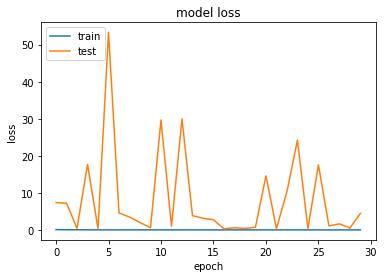

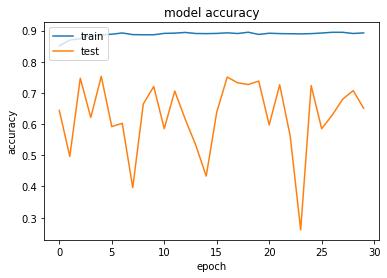

In [20]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
EncoModel.save('AutoEncoderModelBalanced.h5')
FullModel.save('FullModelArticleApproachBalanced.h5')

In [22]:
FullModelT=FullModel
FullModelT.save('FullModelTArticleApproachUnbalanced08.h5')

In [21]:
FullModel.save('FullModelArticleApproachUnbalanced08.h5')

In [13]:
import tensorflow as tf
FullModel= tf.keras.models.load_model('FullModelArticleApproachUnbalanced08.h5')

In [ ]:
#Then we save the model
FullModel.save_weights('autoencoder_classification.h5')

#Terms
##BURT: is a transformar model
##Sentiment Classification: A prabability distrubution over two classes
##Text Encoding: How to encode the texts into a numerical presentation that we can be handled by the machine learning model
##Transformers: The State-Of-The-Art architecture for language modeling
#Word2vec: 2013, The Model that introduced distributed representations for language modeling